*   Multiple Linear Regression
*   Linear Classifiers and Logistic Regression

# 4.1 Multiple Linear Regression in Prediction

In [2]:
import torch
from torch.nn import Linear

torch.manual_seed(1)

model = Linear(in_features=2, out_features=1)

list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
 tensor([-0.1371], requires_grad=True)]

In [3]:
X = torch.tensor([[1.0, 3.0]])
yhat = model(X)
yhat

tensor([[-0.7090]], grad_fn=<AddmmBackward0>)

In [4]:
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = model(X)
yhat

tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward0>)

## Custom Model

In [5]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    out = self.linear(x)
    return out

## Multiple Linear Regression Training
*   Cost function and Gradient Descent for Multiple Linear Regression

In [1]:
# 2-D Dataset
from torch.utils.data import Dataset, DataLoader
class Data2D(Dataset):
  def __init__(self):
    self.x = torch.zeros(20, 2)
    self.x[:, 0] = torch.arange(-1, 1, 0.1)
    self.x[:, 1] = torch.arange(-1, 1, 0.1)
    self.w = torch.tensor([[1.0], [1.0]])
    self.b = 1

    self.f = torch.mm(self.x, self.w) + self.b
    self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [ ]:
dataset = Data2D()
criterion = nn.MSELoss()
train_loader = DataLoader(dataset=dataset, batch_size=2)

In [ ]:
from torch import optim
model = LR(input_size = 2, output_size = 1)
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 100

In [ ]:
for epoch in range(num_epochs):
  for x, y in train_loader:
    yhat = model(x)
    loss = criterion(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 4.2 Multiple Output Linear Regression
*   Linear Regression with Multiple Outputs
* Pytorch
>   * Custom Module
>   * Single and Multiple Samples

In [7]:
# Custom Module
import torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    out = self.linear(x)
    return out

In [9]:
torch.manual_seed(1)

model = LR(input_size=2, output_size=2)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121],
         [-0.1371,  0.3319]], requires_grad=True), Parameter containing:
 tensor([-0.6657,  0.4241], requires_grad=True)]

In [11]:
x = torch.tensor([[1.0, 2.0]])
yhat = model(x)
yhat

tensor([[-0.9256,  0.9508]], grad_fn=<AddmmBackward0>)

## Multiple Ouptput Linear Regression Training

In [19]:
dataset = Data2D()
criterion = nn.MSELoss()
train_loader = DataLoader(dataset=dataset, batch_size=5)

In [20]:
from torch import optim
model = LR(input_size=2, output_size=2)

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [21]:
list_losses = []
num_epochs = 100
for epoch in range(num_epochs):
  for x, y in train_loader:
    yhat = model(x)
    loss = criterion(yhat, y)
    list_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


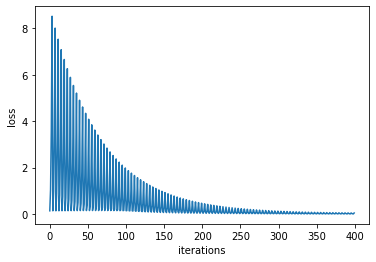

In [22]:
import matplotlib.pyplot as plt
plt.plot(list_losses)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

# 5.0 Linear Classifier and Logistic Regression
*   Linear Classifier
*   Logistic Regression for Classification

# 5.1 Logistic Regression Prediction
*   Logistic Function
*   Build Custom Modules using nn.Modules
*   nn.Sequential

In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

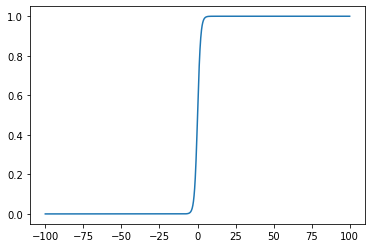

In [25]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)
sigmoid = nn.Sigmoid()
yhat = sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

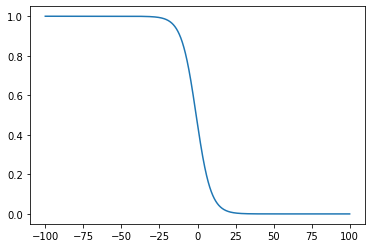

In [30]:
# Build Model with nn.Sequential
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())
yhat = model(z)
plt.plot(z.numpy(), yhat.detach().numpy())

In [43]:
import torch.nn as nn

class logistic_regression(nn.Module):
  def __init__(self, input_size, output_size=1):
    super(logistic_regression, self).__init__()
    self.model = nn.Sequential(nn.Linear(input_size, output_size), nn.Sigmoid())
  def forward(self, x):
    output = self.model(x)
    return output

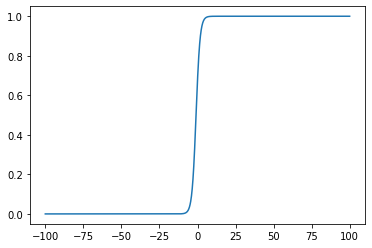

In [44]:
# 1-Dimension Model
model = logistic_regression(input_size=1)
yhat = model(z)
plt.plot(z.numpy(), yhat.detach().numpy())

In [45]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.7662]], requires_grad=True), Parameter containing:
tensor([0.7591], requires_grad=True)]


In [46]:
model.state_dict()

OrderedDict([('model.0.weight', tensor([[0.7662]])),
             ('model.0.bias', tensor([0.7591]))])

In [47]:
# 2-Dimension Model
model_2d = logistic_regression(input_size=2)
print(list(model_2d.parameters()))

[Parameter containing:
tensor([[ 0.3993, -0.1110]], requires_grad=True), Parameter containing:
tensor([0.4738], requires_grad=True)]


# 5.2 Bernoulli Distribution and Maximum Likelihood Estimation
*   Bernoulli Distirbution : Flip a Coin

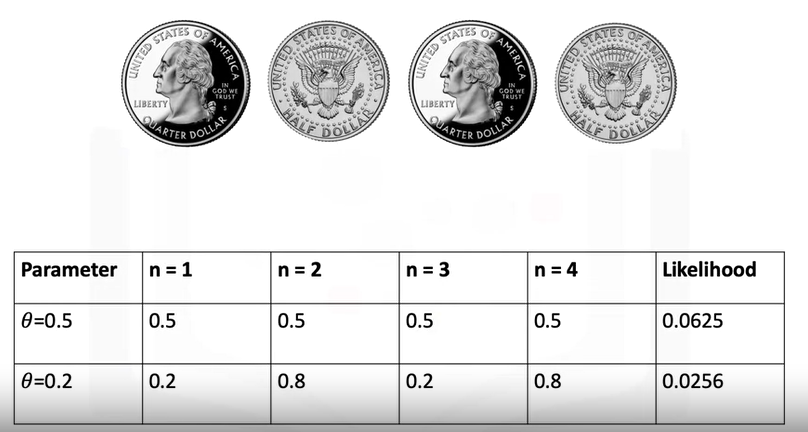

# 5.3 Logistic Regression Cross Entropy Loss
*   Problem with Mean Sequared Error : Threshold를 사용하면 Loss가 Flat한 지점이 나와 학습되지 않음
*   Maximum Likelihood
*   Logistic Regression Cross Entropy

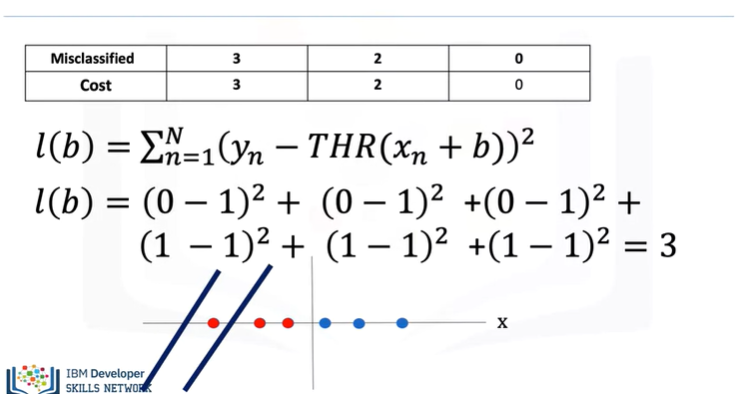

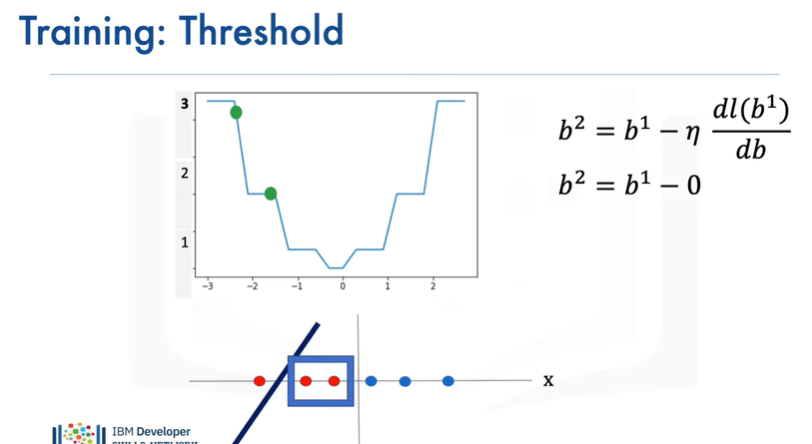

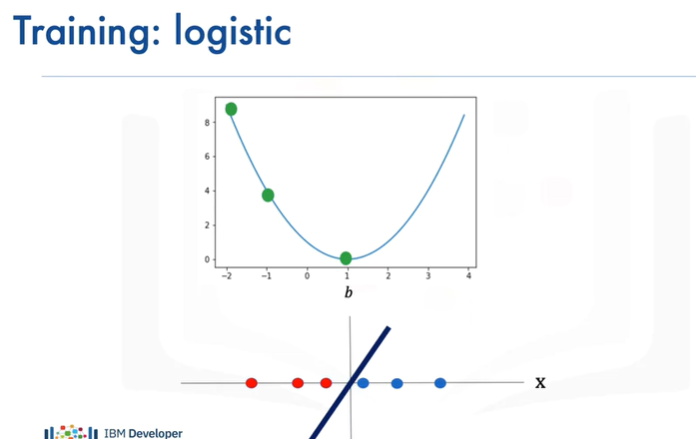

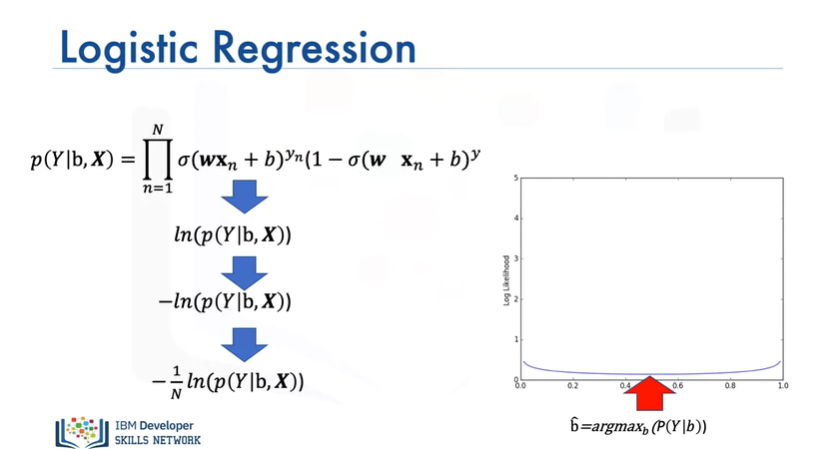

In [84]:
# Create class for plotting and the function for plotting

class plot_error_surfaces(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [85]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [86]:
import torch.nn as nn

class logistic_regression(nn.Module):
  def __init__(self, input_size, output_size=1):
    super(logistic_regression, self).__init__()
    self.model = nn.Sequential(nn.Linear(input_size, output_size), nn.Sigmoid())
  def forward(self, x):
    output = self.model(x)
    return output

In [87]:
MSE_criterion = nn.MSELoss()
BCE_criterion = nn.BCELoss()    # Negative Log Likelihood

In [88]:
dataset = Data()
train_loader = DataLoader(dataset=dataset, batch_size=5)

<Figure size 432x288 with 0 Axes>

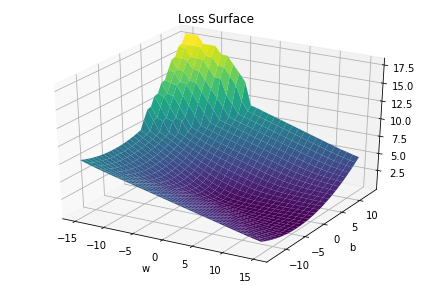

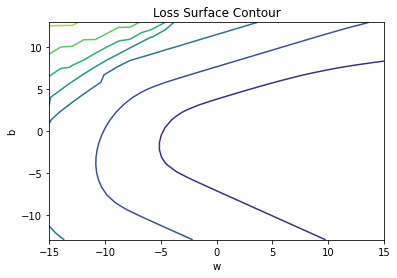

In [94]:
get_surface = plot_error_surfaces(15, 13, dataset[:][0], dataset[:][1], 30)

In [95]:
model = logistic_regression(1, 1)

optimizer = optim.SGD(model.parameters(), lr=2)

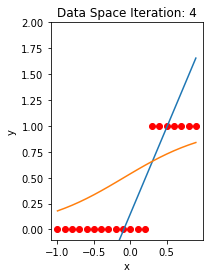

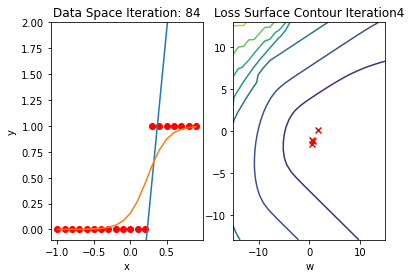

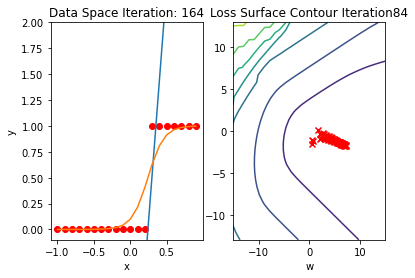

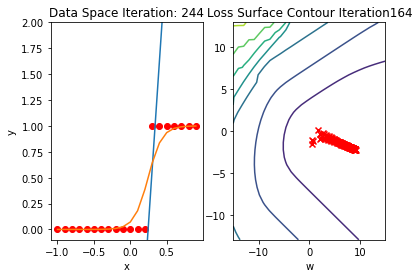

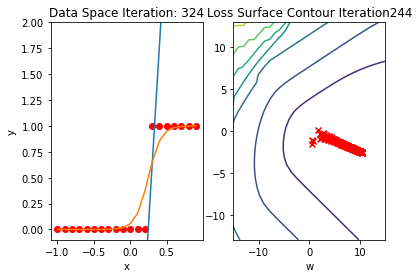

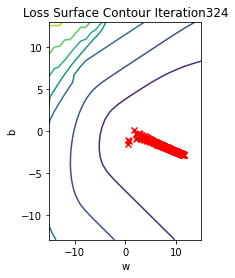

In [96]:
list_losses = []
num_epochs = 100
for epoch in range(num_epochs):
  for x, y in train_loader:
    yhat = model(x)
    loss = BCE_criterion(yhat, y)
    list_losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    get_surface.set_para_loss(model, loss.tolist())
  if epoch % 20 == 0:
    get_surface.plot_ps()

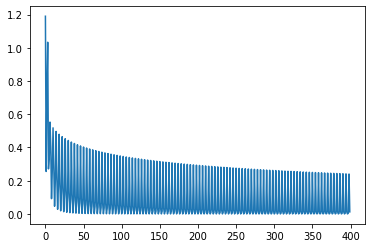

In [97]:
plt.plot(list_losses)
plt.show()